In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install torch

`Imprting Library`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print("Libraries installed successfully.")

Libraries installed successfully.


In [ ]:
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

print("Settings configured successfully.")

Settings configured successfully.


**`(a) Preprocess the dataset as specified in the data mining process.`**

`Importing Dataset`

In [ ]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully.")
    print("\nDataset Overview:\n")
    print(df.info())
    print("\nDataset Preview:\n")
    display(df.head())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nSummary Statistics:\n")
    display(df.describe())
    return df

file_path = '/content/Employee.csv'
df = load_data(file_path)

Data Loaded Successfully.

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None

Dataset Preview:



,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1



Missing Values:

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Summary Statistics:



,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


`Remove Duplicates`

In [ ]:
def drop_duplicates(df):
    df.drop_duplicates(inplace=True)
    print("Duplicates Dropped Successfully.")
    print("\nDataset Overview:\n")
    print(df.info())
    print("\nDataset Preview:\n")
    display(df.head())
    print("\nSummary Statistics:\n")
    display(df.describe())
    return df

df = drop_duplicates(df)

Duplicates Dropped Successfully.

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB
None

Dataset Preview:



,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1



Summary Statistics:



,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


`I. Produce Q-Q Plots and Histograms of the features, and apply the transformations if required.`

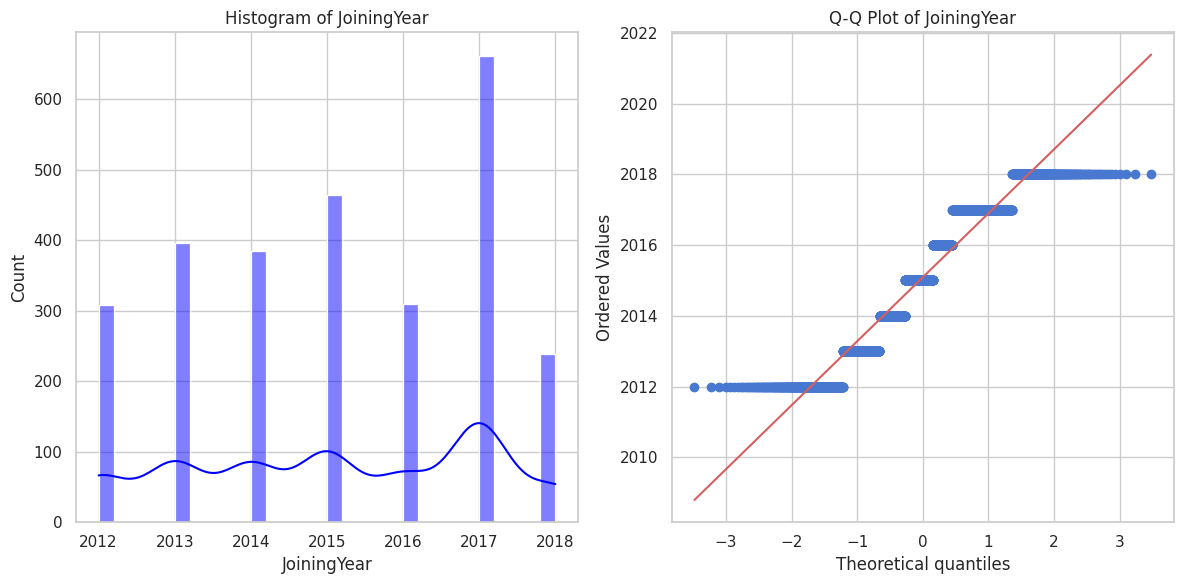

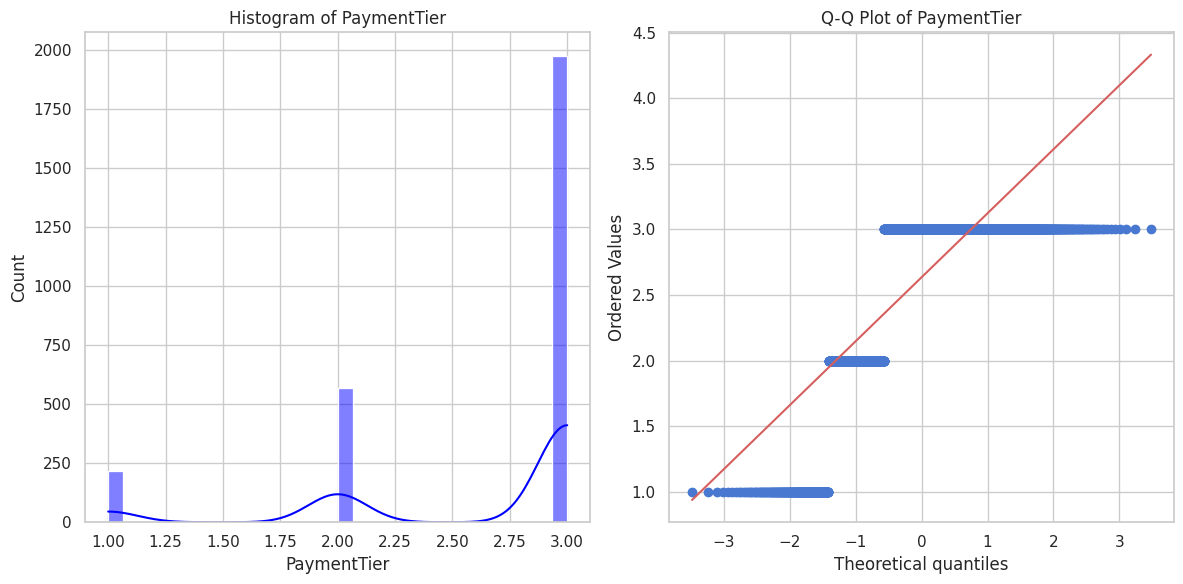

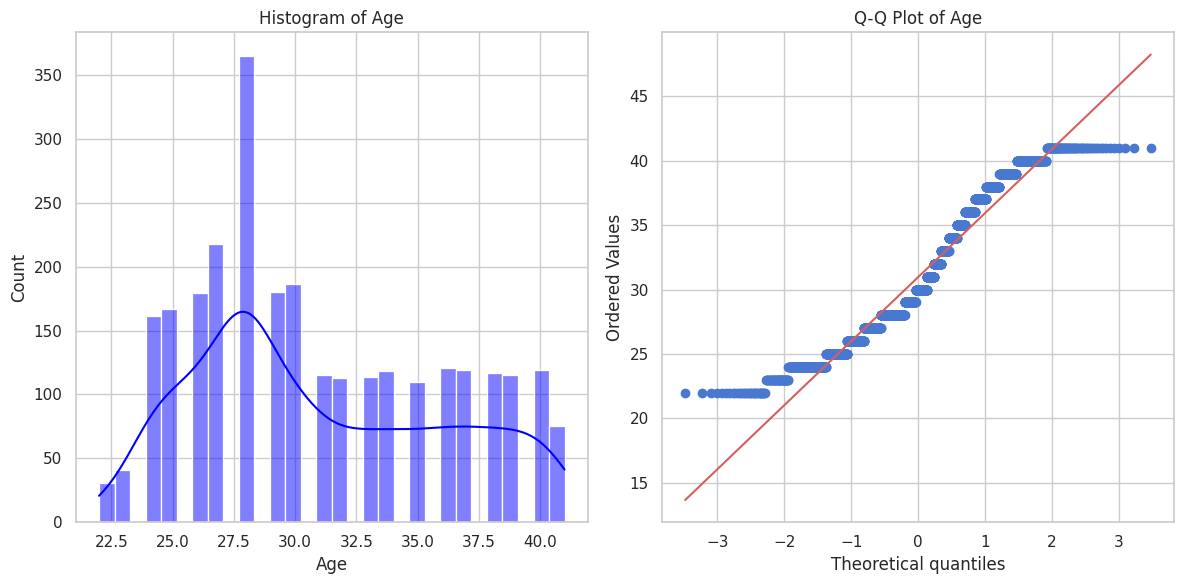

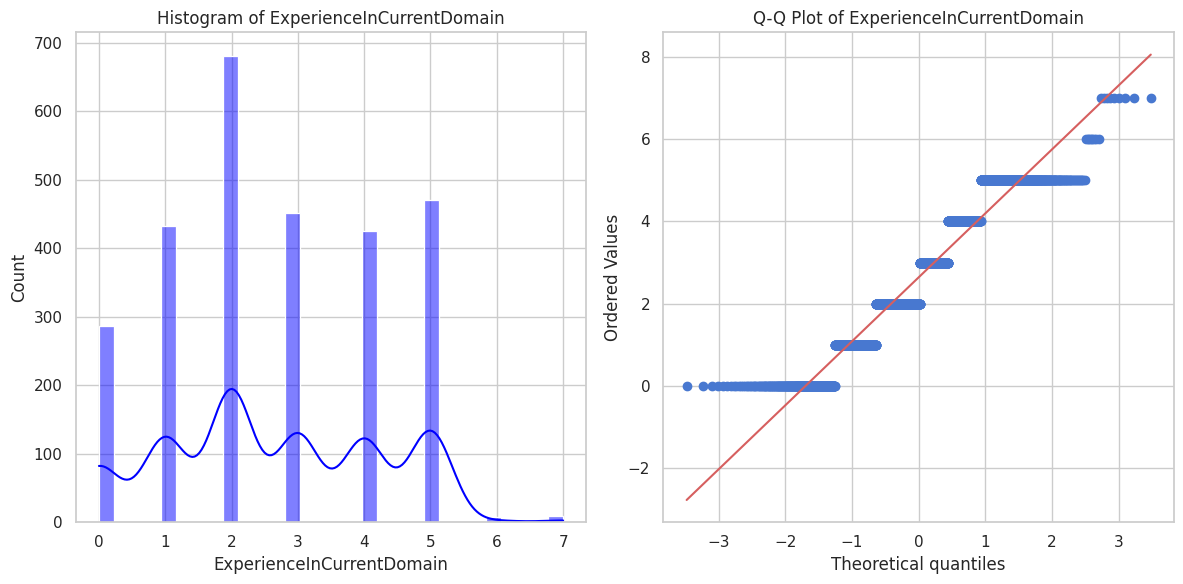

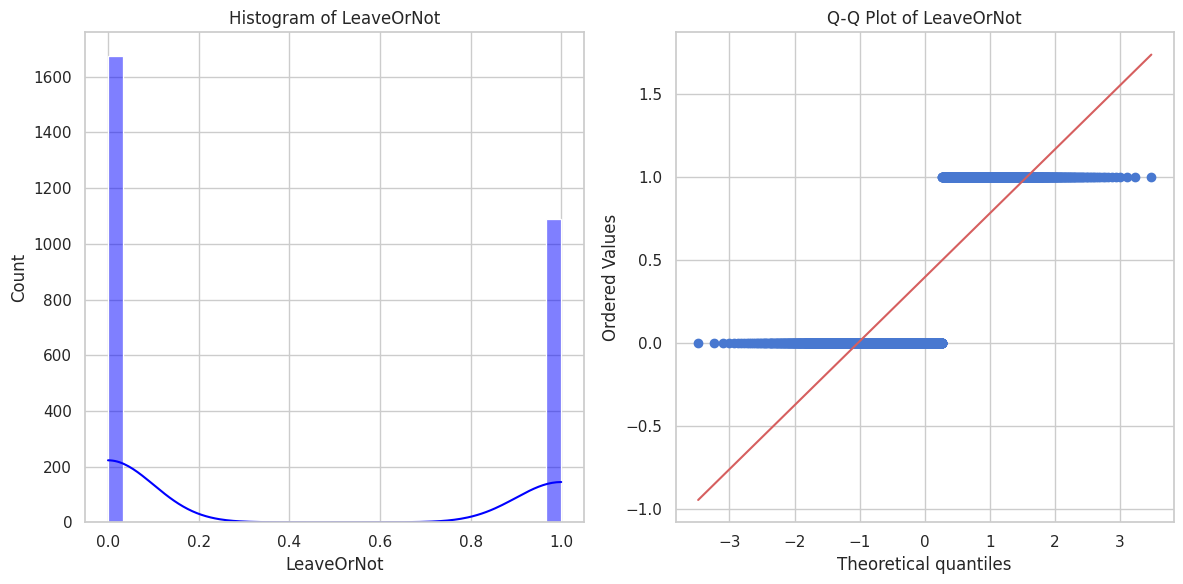

In [ ]:
def visualize_distributions(df, features):
    for feature in features:

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30, color='blue')
        plt.title(f"Histogram of {feature}")

        # Q-Q Plot
        plt.subplot(1, 2, 2)
        probplot(df[feature].dropna(), dist="norm", plot=plt)
        plt.title(f"Q-Q Plot of {feature}")

        plt.tight_layout()
        plt.show()

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
visualize_distributions(df, numerical_features)

`II. If it is required, apply suitable feature coding techniques.`

In [ ]:
def encode_categorical_features(df, method='one-hot'):
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features Identified:", categorical_features.tolist())

    if method == 'label':
        print("Applying Label Encoding...")
        for feature in categorical_features:
            df[feature] = LabelEncoder().fit_transform(df[feature])

    elif method == 'one-hot':
        print("Applying One-Hot Encoding...")
        df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    elif method == 'target':
        print("Applying Target Encoding...")
        target_col = 'LeaveOrNot'
        for feature in categorical_features:
            target_mean = df.groupby(feature)[target_col].mean()
            df[feature] = df[feature].map(target_mean)

    else:
        raise ValueError("Invalid method. Choose 'label', 'one-hot', or 'target'.")

    return df

df_encoded = encode_categorical_features(df, method='one-hot')


Categorical Features Identified: ['Education', 'City', 'Gender', 'EverBenched']
Applying One-Hot Encoding...


`III. Scale and/or standardized the features, produce relevant graphs to show the scaling/ standardizing effect.`

Using Standardization: Scaling features to mean=0 and std=1


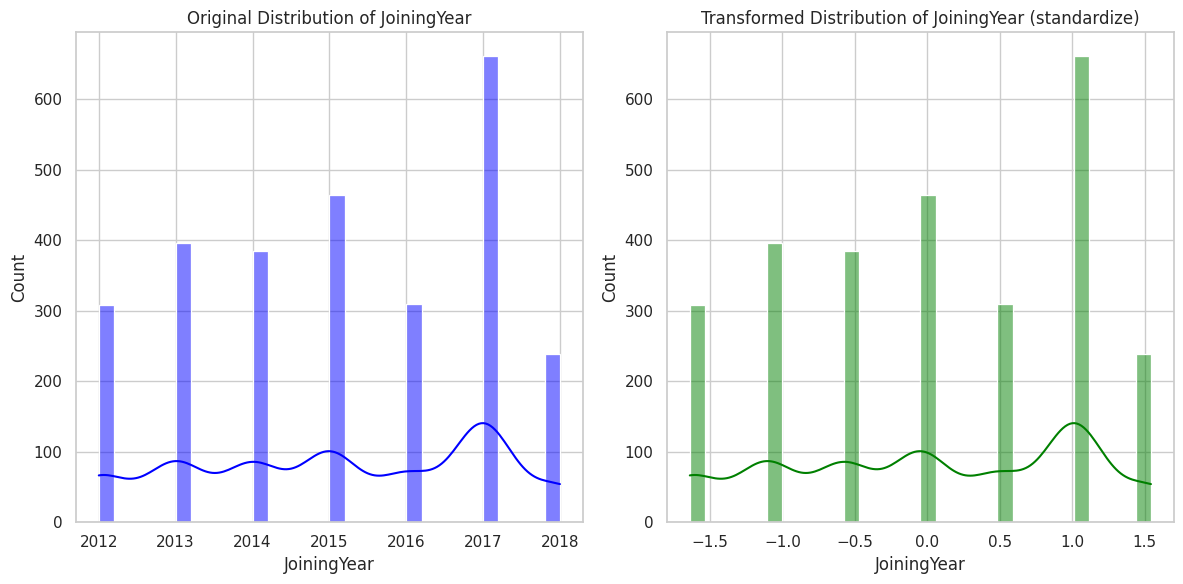

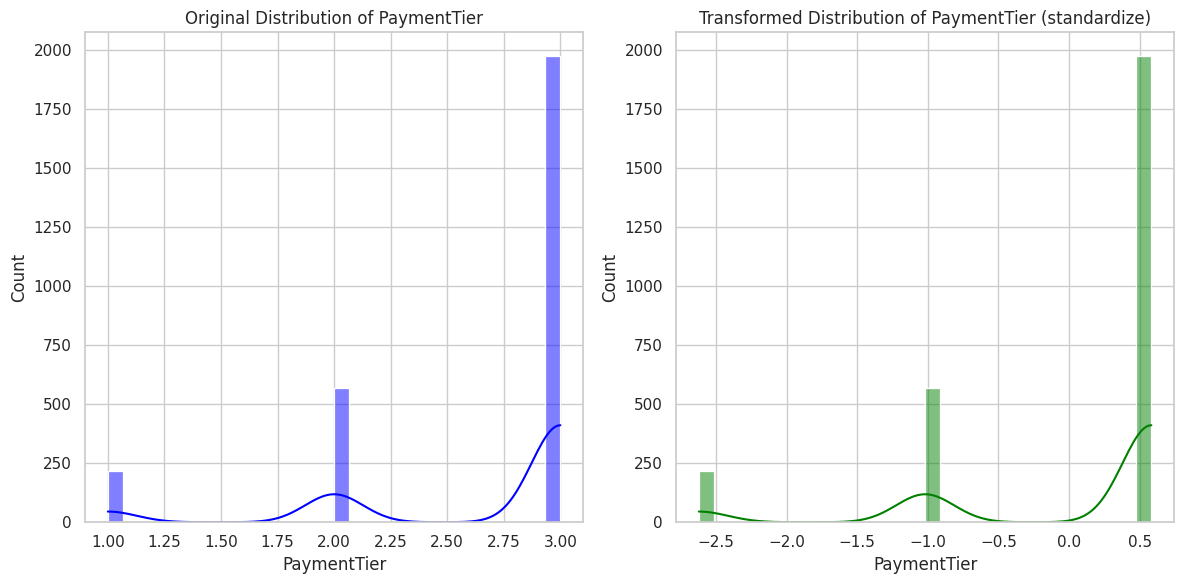

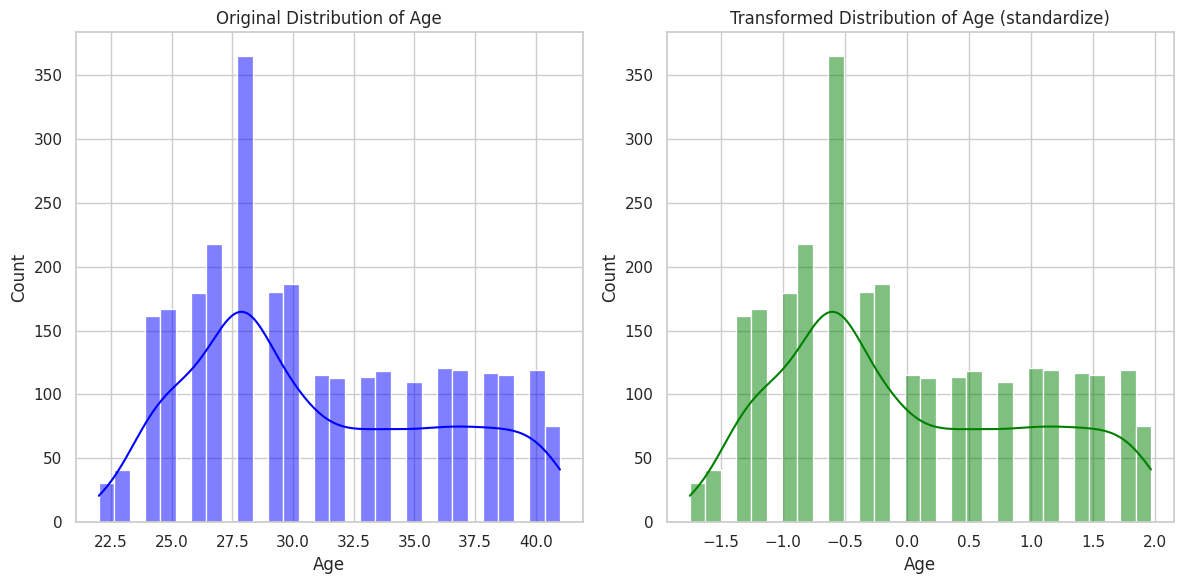

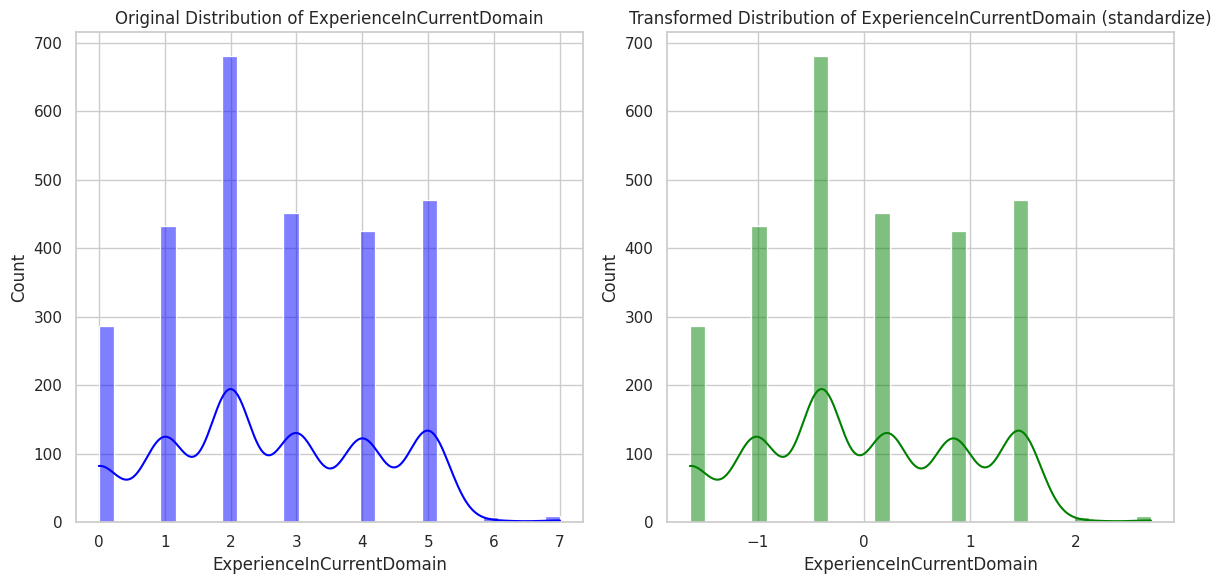

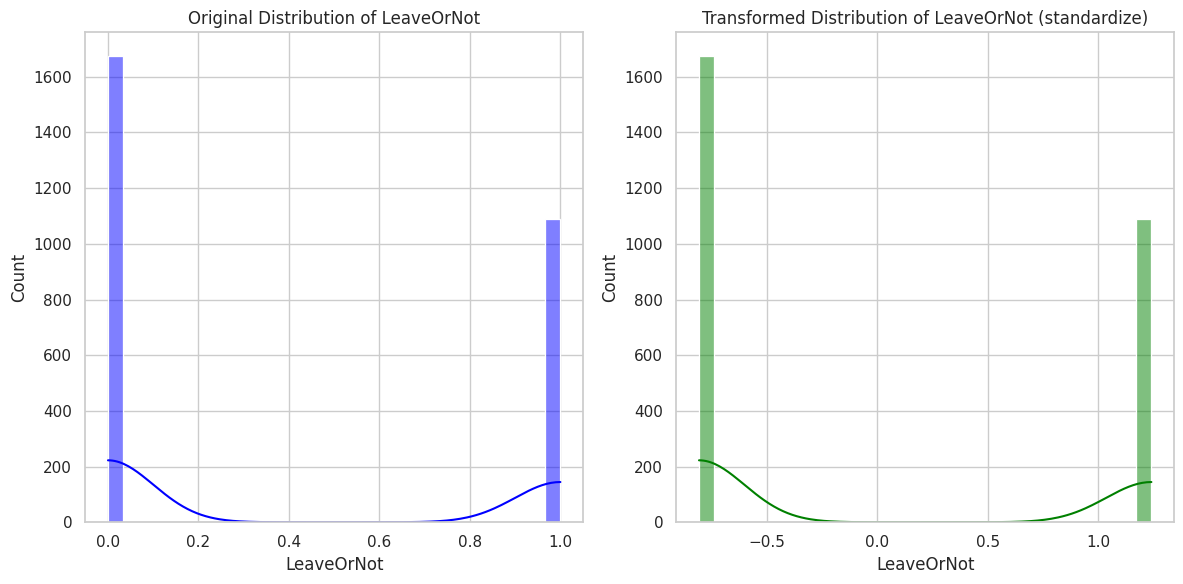

In [ ]:
def scale_and_visualize_features(df, features, method='standardize'):
    if method == 'scale':
        scaler = MinMaxScaler()
        print("Using Min-Max Scaling: Scaling features to range [0, 1]")
    elif method == 'standardize':
        scaler = StandardScaler()
        print("Using Standardization: Scaling features to mean=0 and std=1")
    else:
        raise ValueError("Invalid method. Choose 'scale' or 'standardize'.")

    df_scaled = df.copy()
    df_scaled[features] = scaler.fit_transform(df_scaled[features])

    for feature in features:

        # Original feature
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30, color='blue')
        plt.title(f"Original Distribution of {feature}")

        # Transformed feature
        plt.subplot(1, 2, 2)
        sns.histplot(df_scaled[feature], kde=True, bins=30, color='green')
        plt.title(f"Transformed Distribution of {feature} ({method})")

        plt.tight_layout()
        plt.show()

    return df_scaled

scaled_df = scale_and_visualize_features(df, numerical_features, method='standardize')

`IV. If necessary, apply feature discretization, and produce a relevant graph to show the discretization`

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-123-dad79cf9e80a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')


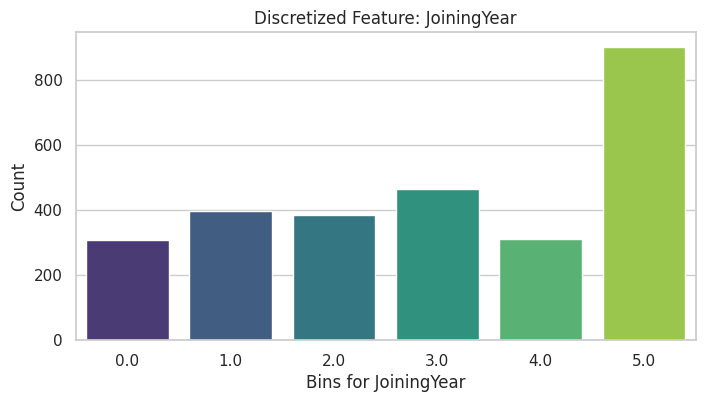

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-123-dad79cf9e80a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')


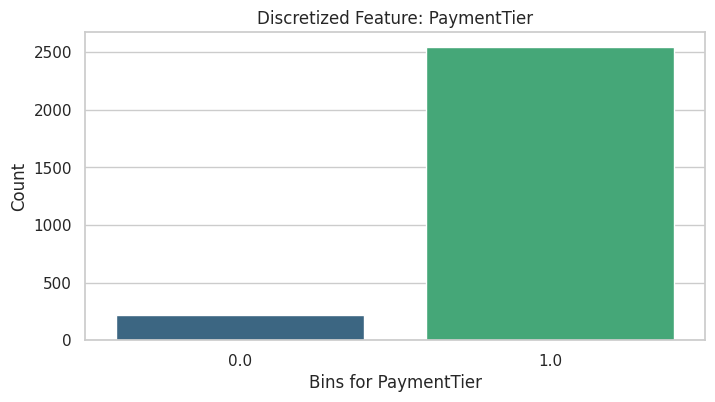

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-123-dad79cf9e80a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')


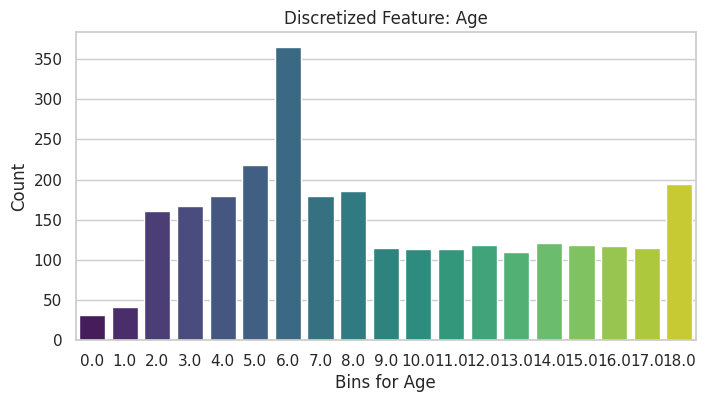

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-123-dad79cf9e80a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')


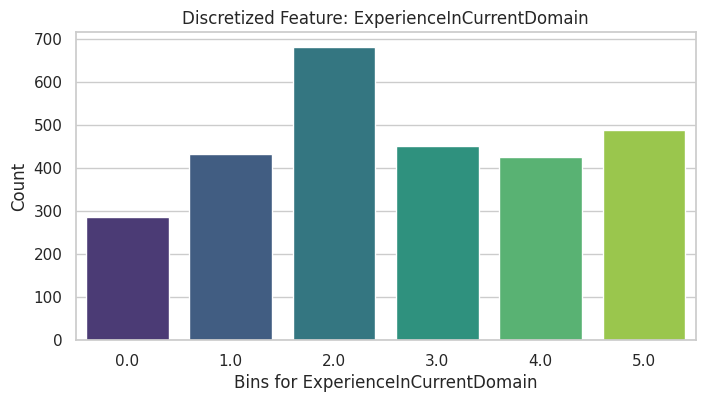

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-123-dad79cf9e80a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')


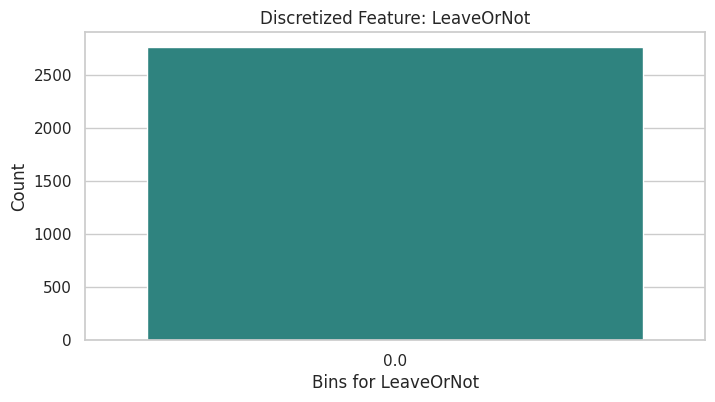

In [ ]:
def discretize_features(df, features, bins=4, strategy='quantile'):
    discretizer = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    for feature in features:
        df[f'{feature}_binned'] = discretizer.fit_transform(df[[feature]])

        plt.figure(figsize=(8, 4))
        sns.countplot(x=f'{feature}_binned', data=df, palette='viridis')
        plt.title(f'Discretized Feature: {feature}')
        plt.xlabel(f'Bins for {feature}')
        plt.ylabel('Count')
        plt.show()

    return df

df = discretize_features(df, numerical_features, bins=50, strategy='quantile')

In [ ]:
df = encode_categorical_features(df, method='one-hot')

def train_test_split_data(df, target_col, test_size=0.2, random_state=SEED):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Split the dataset
target_col = 'LeaveOrNot'
X_train, X_test, y_train, y_test = train_test_split_data(df, target_col)


Categorical Features Identified: ['Education', 'City', 'Gender', 'EverBenched']
Applying One-Hot Encoding...


**`(b) Develop a MLP for binary classification.`**

In [ ]:
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
def train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Initialize model
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    # Training loop with verbose output
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Adjust learning rate
        scheduler.step(total_loss)

        if epoch % 25 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).numpy()
        y_pred = (y_pred_probs >= 0.5).astype(int)

    # Classification metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_pred_probs)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

    return model

Epoch 0/250, Loss: 24.4221
Epoch 25/250, Loss: 15.9012
Epoch 50/250, Loss: 14.8853
Epoch 75/250, Loss: 14.1552
Epoch 100/250, Loss: 14.3610
Epoch 125/250, Loss: 14.1565
Epoch 150/250, Loss: 13.9810
Epoch 175/250, Loss: 14.4756
Epoch 200/250, Loss: 14.3471
Epoch 225/250, Loss: 13.9984

Confusion Matrix:
[[317  16]
 [ 84 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       333
           1       0.89      0.62      0.73       220

    accuracy                           0.82       553
   macro avg       0.84      0.79      0.80       553
weighted avg       0.83      0.82      0.81       553

ROC AUC Score: 0.8565


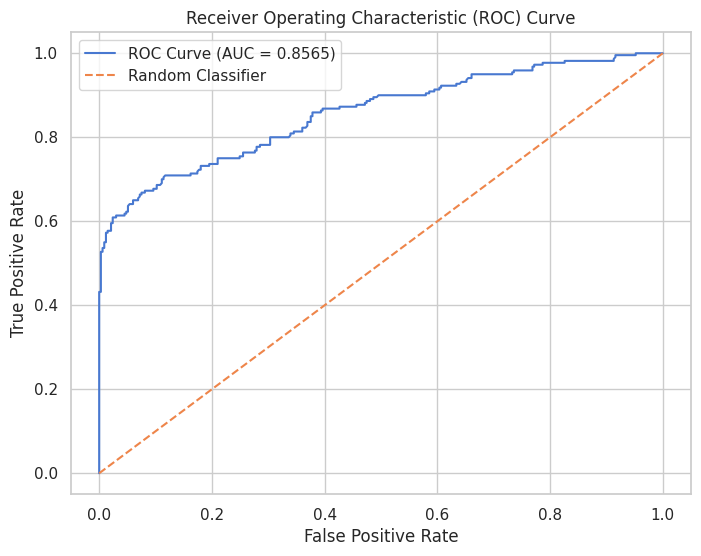

MLPModel(
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test)

**`(c)  Apply the following techniques to predict the value of Y`**

`I. Different wight initialization techniques,`

In [ ]:
class MLPModel(nn.Module):
    def __init__(self, input_dim, init_type='glorot'):
        super(MLPModel, self).__init__()
        self.init_type = init_type

        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.initialize_weights()

    def initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                if self.init_type == 'glorot':
                    nn.init.xavier_uniform_(layer.weight)
                elif self.init_type == 'he':
                    nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')
                elif self.init_type == 'normal':
                    nn.init.normal_(layer.weight, mean=0, std=0.01)
                elif self.init_type == 'zero':
                    nn.init.zeros_(layer.weight)
                elif self.init_type == 'lecun':
                    nn.init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='leaky_relu')
                nn.init.zeros_(layer.bias)

    def forward(self, x):
        return self.layers(x)


def train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='glorot'):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Initialize model
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim, init_type=init_type)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    # Training loop with verbose output
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Adjust learning rate
        scheduler.step(total_loss)

        if epoch % 25 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).numpy()
        y_pred = (y_pred_probs >= 0.5).astype(int)

    # Classification metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


`He Initialization`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='he')

Epoch 0/250, Loss: 27.5060
Epoch 25/250, Loss: 18.8568
Epoch 50/250, Loss: 16.5439
Epoch 75/250, Loss: 15.7380
Epoch 100/250, Loss: 15.1544
Epoch 125/250, Loss: 14.6548
Epoch 150/250, Loss: 14.2682
Epoch 175/250, Loss: 13.9603
Epoch 200/250, Loss: 14.2269
Epoch 225/250, Loss: 14.3779

Confusion Matrix:
[[325   8]
 [ 86 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       333
           1       0.94      0.61      0.74       220

    accuracy                           0.83       553
   macro avg       0.87      0.79      0.81       553
weighted avg       0.85      0.83      0.82       553



`Glorot Initialization`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='glorot')

Epoch 0/250, Loss: 24.3495
Epoch 25/250, Loss: 17.2704
Epoch 50/250, Loss: 15.3307
Epoch 75/250, Loss: 14.7553
Epoch 100/250, Loss: 14.4218
Epoch 125/250, Loss: 14.1511
Epoch 150/250, Loss: 14.2939
Epoch 175/250, Loss: 14.5310
Epoch 200/250, Loss: 14.3076
Epoch 225/250, Loss: 14.7694

Confusion Matrix:
[[322  11]
 [ 88 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       333
           1       0.92      0.60      0.73       220

    accuracy                           0.82       553
   macro avg       0.85      0.78      0.80       553
weighted avg       0.84      0.82      0.81       553



`Normal Initialization`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='normal')

Epoch 0/250, Loss: 22.8725
Epoch 25/250, Loss: 15.2589
Epoch 50/250, Loss: 14.3556
Epoch 75/250, Loss: 14.3445
Epoch 100/250, Loss: 13.9561
Epoch 125/250, Loss: 13.6349
Epoch 150/250, Loss: 14.0906
Epoch 175/250, Loss: 13.7473
Epoch 200/250, Loss: 14.0071
Epoch 225/250, Loss: 13.6529

Confusion Matrix:
[[324   9]
 [ 88 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       333
           1       0.94      0.60      0.73       220

    accuracy                           0.82       553
   macro avg       0.86      0.79      0.80       553
weighted avg       0.85      0.82      0.81       553



`Zero Initialization`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='zero')

Epoch 0/250, Loss: 24.2107
Epoch 25/250, Loss: 23.4607
Epoch 50/250, Loss: 23.4252
Epoch 75/250, Loss: 23.4532
Epoch 100/250, Loss: 23.4532
Epoch 125/250, Loss: 23.4363
Epoch 150/250, Loss: 23.4363
Epoch 175/250, Loss: 23.4532
Epoch 200/250, Loss: 23.4701
Epoch 225/250, Loss: 23.4814

Confusion Matrix:
[[333   0]
 [220   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       333
           1       0.00      0.00      0.00       220

    accuracy                           0.60       553
   macro avg       0.30      0.50      0.38       553
weighted avg       0.36      0.60      0.45       553



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


`Lecun Initialization`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, init_type='lecun')

Epoch 0/250, Loss: 26.0121
Epoch 25/250, Loss: 18.5415
Epoch 50/250, Loss: 16.2749
Epoch 75/250, Loss: 15.3819
Epoch 100/250, Loss: 15.1239
Epoch 125/250, Loss: 15.7249
Epoch 150/250, Loss: 15.1751
Epoch 175/250, Loss: 15.5003
Epoch 200/250, Loss: 15.2144
Epoch 225/250, Loss: 15.3123

Confusion Matrix:
[[319  14]
 [ 86 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       333
           1       0.91      0.61      0.73       220

    accuracy                           0.82       553
   macro avg       0.85      0.78      0.80       553
weighted avg       0.83      0.82      0.81       553



`II. Different activation function`

In [ ]:
# Activation Functions
class ActivationFunctions:
    @staticmethod
    def get_activation_function(name):
        if name == 'relu':
            return nn.ReLU()
        elif name == 'leaky_relu':
            return nn.LeakyReLU(negative_slope=0.01)
        elif name == 'softmax':
            return nn.Softmax(dim=1)
        elif name == 'swish':
            return nn.Sigmoid()
        else:
            return nn.ReLU()

    @staticmethod
    def swish(x):
        return x * torch.sigmoid(x)


class MLPModel(nn.Module):
    def __init__(self, input_dim, activation_type='relu'):
        super(MLPModel, self).__init__()

        self.activation_type = activation_type

        # Define layers with flexible activation function
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            ActivationFunctions.get_activation_function(self.activation_type),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            ActivationFunctions.get_activation_function(self.activation_type),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            ActivationFunctions.get_activation_function(self.activation_type),
            nn.Dropout(0.2),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


def train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='relu'):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Initialize model
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim, activation_type=activation_type)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    # Training loop with verbose output
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Adjust learning rate
        scheduler.step(total_loss)

        if epoch % 25 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).numpy()
        y_pred = (y_pred_probs >= 0.5).astype(int)

    # Classification metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

`Relu Activation`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='relu')

Epoch 0/250, Loss: 23.7081
Epoch 25/250, Loss: 16.3245
Epoch 50/250, Loss: 14.7938
Epoch 75/250, Loss: 14.1764
Epoch 100/250, Loss: 14.6853
Epoch 125/250, Loss: 14.3447
Epoch 150/250, Loss: 14.3590
Epoch 175/250, Loss: 14.4072
Epoch 200/250, Loss: 14.3812
Epoch 225/250, Loss: 14.5199

Confusion Matrix:
[[316  17]
 [ 84 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       333
           1       0.89      0.62      0.73       220

    accuracy                           0.82       553
   macro avg       0.84      0.78      0.80       553
weighted avg       0.83      0.82      0.81       553



`Leaky_relu Activation`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='leaky_relu')

Epoch 0/250, Loss: 24.0650
Epoch 25/250, Loss: 16.5076
Epoch 50/250, Loss: 14.7733
Epoch 75/250, Loss: 14.4903
Epoch 100/250, Loss: 14.1071
Epoch 125/250, Loss: 13.8296
Epoch 150/250, Loss: 13.9804
Epoch 175/250, Loss: 13.6212
Epoch 200/250, Loss: 13.6126
Epoch 225/250, Loss: 13.7952

Confusion Matrix:
[[317  16]
 [ 84 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       333
           1       0.89      0.62      0.73       220

    accuracy                           0.82       553
   macro avg       0.84      0.79      0.80       553
weighted avg       0.83      0.82      0.81       553



`Softmax Activation`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='softmax')

Epoch 0/250, Loss: 24.1339
Epoch 25/250, Loss: 18.6520
Epoch 50/250, Loss: 16.6968
Epoch 75/250, Loss: 15.9732
Epoch 100/250, Loss: 16.0243
Epoch 125/250, Loss: 16.0281
Epoch 150/250, Loss: 16.0143
Epoch 175/250, Loss: 16.1362
Epoch 200/250, Loss: 16.0910
Epoch 225/250, Loss: 16.1436

Confusion Matrix:
[[313  20]
 [ 81 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       333
           1       0.87      0.63      0.73       220

    accuracy                           0.82       553
   macro avg       0.83      0.79      0.80       553
weighted avg       0.83      0.82      0.81       553



`Swish Activation`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='swish')

Epoch 0/250, Loss: 23.4594
Epoch 25/250, Loss: 19.7976
Epoch 50/250, Loss: 18.4369
Epoch 75/250, Loss: 17.7220
Epoch 100/250, Loss: 17.4772
Epoch 125/250, Loss: 17.2627
Epoch 150/250, Loss: 17.2061
Epoch 175/250, Loss: 16.8747
Epoch 200/250, Loss: 16.7584
Epoch 225/250, Loss: 16.7037

Confusion Matrix:
[[312  21]
 [ 86 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       333
           1       0.86      0.61      0.71       220

    accuracy                           0.81       553
   macro avg       0.82      0.77      0.78       553
weighted avg       0.82      0.81      0.80       553



` III. Do the trial-error based hyper-parameter training.`

In [ ]:
class MLPModel(nn.Module):
    def __init__(self, input_dim, activation_type='relu', optimizer_type='adam', hidden_layers=3, neurons_per_layer=64):
        super(MLPModel, self).__init__()

        # Activation functions dictionary
        activation_dict = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(),
            'softmax': nn.Softmax(dim=1),
            'swish': nn.SiLU(),
        }

        # Initialize layers dynamically
        layers = []
        prev_layer_dim = input_dim

        for _ in range(hidden_layers):
            layers.append(nn.Linear(prev_layer_dim, neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(activation_dict.get(activation_type, nn.ReLU()))
            layers.append(nn.Dropout(0.3))
            prev_layer_dim = neurons_per_layer

        # Output layer
        layers.append(nn.Linear(prev_layer_dim, 1))
        layers.append(nn.Sigmoid())

        # Combine layers
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='relu', optimizer_type='adam', hidden_layers=3, neurons_per_layer=64):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Initialize model
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim, activation_type=activation_type, optimizer_type=optimizer_type, hidden_layers=hidden_layers, neurons_per_layer=neurons_per_layer)

    # Loss function
    criterion = nn.BCELoss()

    # Choose optimizer based on user input
    if optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    # Training loop
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Adjust learning rate
        scheduler.step(total_loss)

        if epoch % 25 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).numpy()
        y_pred = (y_pred_probs >= 0.5).astype(int)

    # Classification metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



`Train Configuration 1: Adam optimizer, ReLU, 3 hidden layers, 64 neurons`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001,
                               activation_type='relu', optimizer_type='adam', hidden_layers=3, neurons_per_layer=64)


Epoch 0/250, Loss: 23.3725
Epoch 25/250, Loss: 15.9787
Epoch 50/250, Loss: 15.0830
Epoch 75/250, Loss: 14.4539
Epoch 100/250, Loss: 14.4050
Epoch 125/250, Loss: 14.2260
Epoch 150/250, Loss: 14.4513
Epoch 175/250, Loss: 14.1820
Epoch 200/250, Loss: 14.5427
Epoch 225/250, Loss: 14.2754


ImprovedMLPModel(
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=64, out_features=1, bias=True)
    (13): Sigmoid()
  )
)

`Train Configuration 2: sgd optimizer, ReLU, 4 hidden layers, 128 neurons`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001,
                     activation_type='tanh', optimizer_type='sgd', hidden_layers=4, neurons_per_layer=128)

Epoch 0/250, Loss: 25.0676
Epoch 25/250, Loss: 23.2911
Epoch 50/250, Loss: 22.7175
Epoch 75/250, Loss: 22.3865
Epoch 100/250, Loss: 22.1689
Epoch 125/250, Loss: 22.1735
Epoch 150/250, Loss: 22.2628
Epoch 175/250, Loss: 21.9662
Epoch 200/250, Loss: 22.2021
Epoch 225/250, Loss: 22.1123

Confusion Matrix:
[[310  23]
 [168  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.76       333
           1       0.69      0.24      0.35       220

    accuracy                           0.65       553
   macro avg       0.67      0.58      0.56       553
weighted avg       0.67      0.65      0.60       553



`Train Configuration 3: Adam optimizer, leaky_relu, 2 hidden layers, 32 neurons`

In [ ]:
train_improved_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001,
                     activation_type='leaky_relu', optimizer_type='adam', hidden_layers=2, neurons_per_layer=32)

Epoch 0/250, Loss: 25.3543
Epoch 25/250, Loss: 16.5630
Epoch 50/250, Loss: 15.6317
Epoch 75/250, Loss: 15.4223
Epoch 100/250, Loss: 15.7935
Epoch 125/250, Loss: 15.6503
Epoch 150/250, Loss: 16.0760
Epoch 175/250, Loss: 15.7103
Epoch 200/250, Loss: 15.4813
Epoch 225/250, Loss: 15.4127

Confusion Matrix:
[[310  23]
 [ 83 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       333
           1       0.86      0.62      0.72       220

    accuracy                           0.81       553
   macro avg       0.82      0.78      0.79       553
weighted avg       0.82      0.81      0.80       553



**`(d) Using suitable evaluation matrices, evaluate the performance of the model under different threshold values.`**

In [ ]:
class MLPModel(nn.Module):
    def __init__(self, input_dim, activation_type='relu', optimizer_type='adam', hidden_layers=3, neurons_per_layer=64):
        super(MLPModel, self).__init__()

        # Activation functions dictionary
        activation_dict = {
            'relu': nn.ReLU(),
            'leaky_relu': nn.LeakyReLU(),
            'softmax': nn.Softmax(dim=1),
            'swish': nn.SiLU(),
        }

        # Initialize layers dynamically
        layers = []
        prev_layer_dim = input_dim

        for _ in range(hidden_layers):
            layers.append(nn.Linear(prev_layer_dim, neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(activation_dict.get(activation_type, nn.ReLU()))
            layers.append(nn.Dropout(0.3))
            prev_layer_dim = neurons_per_layer

        # Output layer
        layers.append(nn.Linear(prev_layer_dim, 1))
        layers.append(nn.Sigmoid())

        # Combine layers
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def train_and_evaluate_model(X_train, y_train, X_test, y_test, epochs=250, lr=0.001, activation_type='relu', optimizer_type='adam', hidden_layers=3, neurons_per_layer=64):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled.astype(np.float32))
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_scaled.astype(np.float32))
    y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    # Initialize model
    input_dim = X_train.shape[1]
    model = MLPModel(input_dim, activation_type=activation_type, optimizer_type=optimizer_type, hidden_layers=hidden_layers, neurons_per_layer=neurons_per_layer)

    # Loss function
    criterion = nn.BCELoss()

    # Choose optimizer based on user input
    if optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    # Training loop
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Adjust learning rate
        scheduler.step(total_loss)

        if epoch % 25 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).numpy()
        y_pred = (y_pred_probs >= 0.5).astype(int)

    # Performance metrics
    thresholds = np.arange(0.1, 1.0, 0.1)
    accuracies, precisions, recalls, f1_scores, roc_auc_scores = [], [], [], [], []

    for threshold in thresholds:
        y_pred_thresh = (y_pred_probs >= threshold).astype(int)
        accuracies.append(accuracy_score(y_test, y_pred_thresh))
        precisions.append(precision_score(y_test, y_pred_thresh))
        recalls.append(recall_score(y_test, y_pred_thresh))
        f1_scores.append(f1_score(y_test, y_pred_thresh))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred_probs))

    # Plot metrics vs thresholds
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.plot(thresholds, accuracies, label="Accuracy")
    plt.title("Accuracy vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")

    plt.subplot(2, 3, 2)
    plt.plot(thresholds, precisions, label="Precision", color='orange')
    plt.title("Precision vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Precision")

    plt.subplot(2, 3, 3)
    plt.plot(thresholds, recalls, label="Recall", color='green')
    plt.title("Recall vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Recall")

    plt.subplot(2, 3, 4)
    plt.plot(thresholds, f1_scores, label="F1 Score", color='red')
    plt.title("F1 Score vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")

    plt.subplot(2, 3, 5)
    plt.plot(thresholds, roc_auc_scores, label="ROC-AUC", color='purple')
    plt.title("ROC-AUC vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("ROC-AUC")

    plt.tight_layout()
    plt.show()

    # Confusion matrix for default threshold (0.5)
    optimal_threshold = 0.5
    y_pred_optimal = (y_pred_probs >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_optimal)
    print(f"Confusion Matrix at Threshold {optimal_threshold}:")
    print(cm)

    # ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return model


Epoch 0/250, Loss: 8.9581
Epoch 25/250, Loss: 3.5997
Epoch 50/250, Loss: 2.8290
Epoch 75/250, Loss: 2.3166
Epoch 100/250, Loss: 1.9948
Epoch 125/250, Loss: 2.4603
Epoch 150/250, Loss: 1.7266
Epoch 175/250, Loss: 2.2132
Epoch 200/250, Loss: 1.9248
Epoch 225/250, Loss: 2.0866


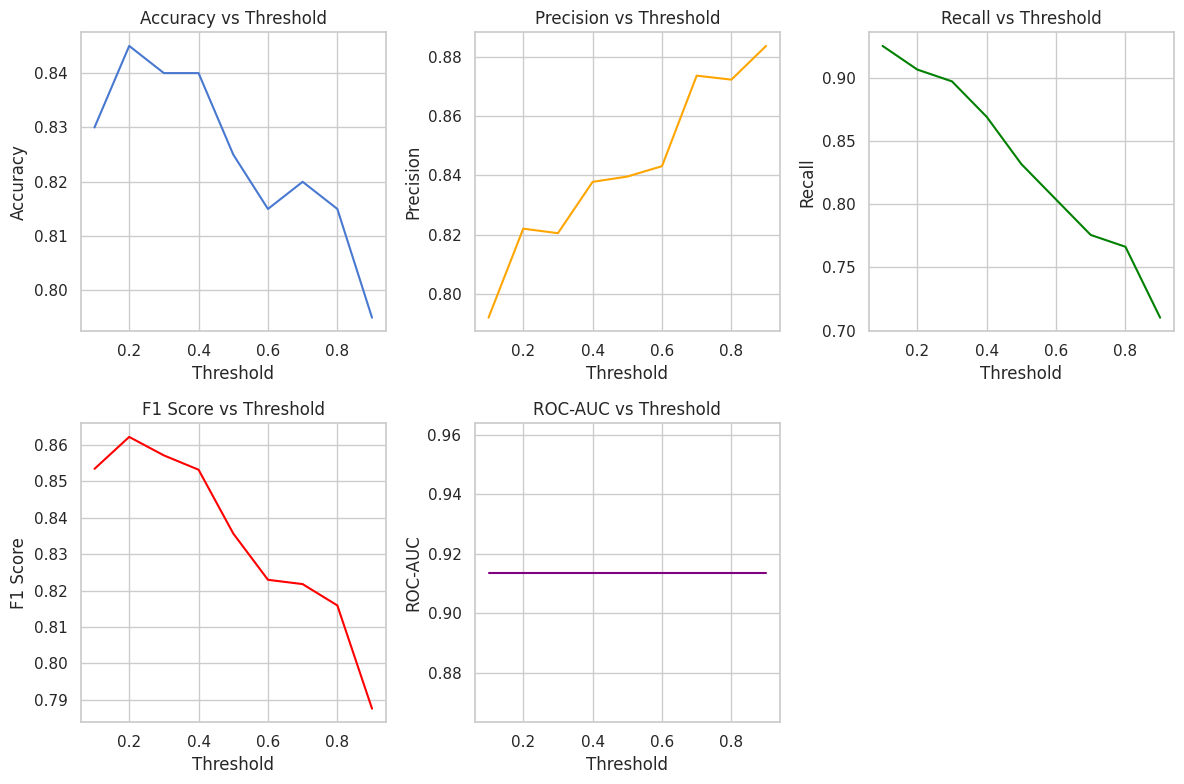

Confusion Matrix at Threshold 0.5:
[[76 17]
 [18 89]]


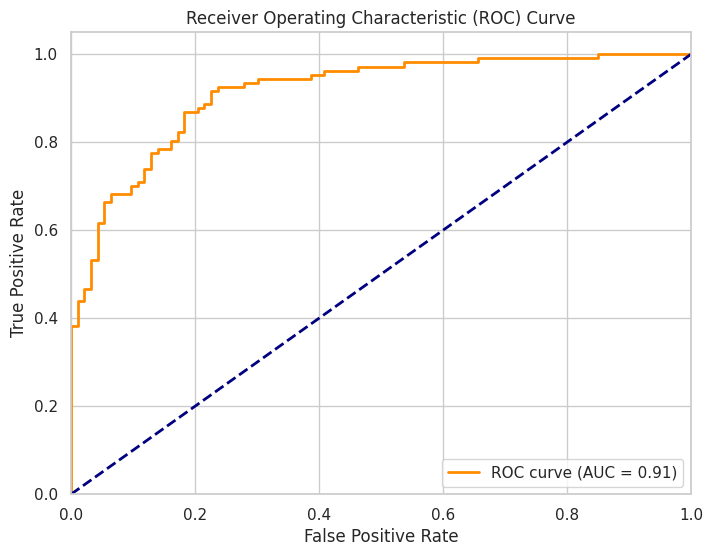

In [ ]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Convert to DataFrame for compatibility (optional)
X = pd.DataFrame(X)
y = pd.Series(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the train_and_evaluate_model function
trained_model = train_and_evaluate_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=250,
    lr=0.001,
    activation_type='relu',
    optimizer_type='adam',
    hidden_layers=3,
    neurons_per_layer=64
)
